In [109]:
import plotly.plotly as py
import plotly.graph_objs as go
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image
plt.style.use('ggplot')
%matplotlib inline

In [110]:
import plotly.tools as tls
tls.set_credentials_file(username='imoewi01', api_key='b8qvv6pv20')

In [111]:
# Data downloaded from gradschoolshopper.com
acceptance = pd.read_excel("AcceptanceRates.xlsx")
deadlines = pd.read_excel("AppDeadlines.xlsx")
location = pd.read_excel("DepartmentLocation.xlsx")
research = pd.read_excel("DepartmentResearchParticle.xlsx")
size = pd.read_excel("DepartmentSize.xlsx")
aid = pd.read_excel("FinancialAid.xlsx")
gre = pd.read_excel("GRERequirements.xlsx")
budget = pd.read_excel("ResearchBudget.xlsx")
df_list = [deadlines, location, size, aid, gre, budget]# research]

Merge all the data frames

In [112]:
composite = acceptance
for dataframe in df_list:
    composite = pd.merge(composite, dataframe, left_on=['School name','Department'], right_on = ['School name', 'Department'])

In [113]:
composite = pd.merge(composite, research, left_on='School name', right_on='School name')

In [114]:
composite = composite.fillna(1)

In [115]:
composite = composite[composite['Department'] == 'Physics'].append(composite[composite['Department'] == 'Physics & Astronomy']).append(composite[composite['Department']== 'Physics and Astronomy'])

Delete useless columns

In [116]:
del composite['Research outside department budget ($)']
del composite['Research type']
del composite['Total full-time equivalent positions']
del composite['Total first-year female graduate students']
del composite['Total first-year graduate students']
del composite['Department']
del composite['Receive partial waivers']
del composite['Total research budget ($)']
del composite['Departmental research']

In [117]:
composite = composite.drop_duplicates('School name')

# Lets set up a golf style score for the schools
1. 1 - number applied/max applied. Favors schools with higher number of applicants.
2. 1 - num full time grad students / max students. All grad students should be full time.
3. Acceptance rate. More exclusive schools are favored.
4. Matriculation rate. The best universities should have around 100% of the students accepted attend.
5. Calculate a per capita departmental research budget and calculate 1 - it/max(all schools). Favors schools with large research budgets relative to the number of students they have.
6. 1 - % receiving tuition waivers at the school. In physics all grad students should have tuition waived for PhD's.
7. 1 - number faculty / max(number faculty). Favors schools with more faculty members.
8. 1 - GRE Score / max(GRE Score). Favors schools with higher GRE requirements.

In [118]:
composite['AppScore'] = 1-composite['Number applied']/max(composite['Number applied'])

In [119]:
composite['StudentsScore'] = 1- composite['Total full-time graduate students']/max(composite['Total full-time graduate students'])

In [120]:
composite['MatriculationScore'] = (1- composite['Number enrolled'] / composite['Number admitted'])

In [121]:
composite['PerCapitaBudget'] = composite['Departmental research budget ($)'].divide(composite['Total full-time graduate students'])

In [122]:
composite['PerCapitaScore'] = 1 - composite['PerCapitaBudget']/max(composite['PerCapitaBudget'])

In [123]:
composite['TuitionScore'] = 1 - composite['Receive full tuition waivers']/composite['Number enrolled']

In [124]:
composite['FacultyScore'] = 1 - composite['Total full-time faculty']/max(composite['Total full-time faculty'])

In [125]:
composite['GREScore'] = 1 - composite['Minimum GRE Physics']/max(composite['Minimum GRE Physics'])

In [126]:
final = composite[['School name', 'State']]

In [127]:
final['Score'] = composite['AppScore'] + composite['StudentsScore'] + composite['MatriculationScore'] + composite['PerCapitaScore'] + composite['TuitionScore'] + composite['FacultyScore'] + composite['GREScore']

/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [133]:
final = final.sort_values('Score')
final

,School name,State,Score,Rank
0,Massachusetts Institute of Technology,MA,1.531781,1
1,"University of California, Berkeley",CA,1.766678,2
2,"University of Illinois, Urbana-Champaign",IL,2.574272,3
3,"University of California, Santa Barbara",CA,2.834246,4
4,"University of Colorado, Boulder",CO,2.900550,5
5,Boston University,MA,3.009941,6
6,Harvard University,MA,3.176658,7
7,"University of California, Los Angeles",CA,3.197063,8
8,University of Texas at Austin,TX,3.268353,9
9,"Rutgers University, New Brunswick",NJ,3.374559,10


In [134]:
final = final.reset_index()
del final['index']
final = final.reset_index()
final['Rank'] = final['index']+1
del final['index']

In [135]:
grouped1 = final.groupby('State').mean()

In [136]:
grouped1 = grouped1[['Score']]

In [137]:
grouped2 = final.groupby('State').min()
grouped2 = grouped2[['Score']]
grouped2.sort_values('Score')

,Score
State,
MA,1.531781
CA,1.766678
IL,2.574272
CO,2.900550
TX,3.268353
NJ,3.374559
IN,3.439703
NY,3.441229
WA,3.461850


In [138]:
grouped2 = grouped2.sort_values('Score')
grouped2= grouped2.reset_index()
grouped2 = grouped2.reset_index()
grouped2['Ranking'] = grouped2['index']+1
del grouped2['index']

In [139]:
states = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", 
          "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
          "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
          "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
          "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]
dictionary = {}
for state in states:
    dictionary[state] = 40.0

In [140]:
alist = []
for state in grouped2['State']:
    alist.append(state)

missing = []
for state in states:
    if state not in alist:
        missing.append(state)
        
final_states_dict = { state: dictionary[state] for state in missing }

In [141]:
state_frame = pd.DataFrame(list(final_states_dict.items()),columns=['State','Ranking'])

In [142]:
grouped2 = grouped2.append(state_frame, ignore_index=True)

In [143]:
scl = [[0, 'rgb(0,230,0)'],[0.2, 'rgb(0,250,150)'],[0.4, 'rgb(0,250,150)'],\
            [0.6, 'rgb(0,250,250)'],[0.8, 'rgb(0,150,250)'],[1.0, 'rgb(250,0,0)']]

In [144]:
data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = grouped2['State'],
        z = grouped2['Ranking'].astype(float),
        locationmode = 'USA-states',
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            )
        ),
        colorbar = dict(
            title = "Ranking"
        )
    ) ]

In [145]:
layout = dict(
        title = 'Plot of Best Schools for Physics in Each State',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)',
        ),
    )
fig = dict( data=data, layout=layout )

In [146]:
url = py.plot( fig, filename='Best-in-State-Physics')

# Final Plot of Results

This graph ranks states by the best school in each state according to the ranking system I implemented above. To determine the ranking I used acceptance rates, matriculation rates, GRE scores, funding per grad student, percent of full time students, percent of students with fee waivers, and full time faculty members. The data used to calculate these rankings comes from the gradschoolshopper website, and while this site has an extensive amount of information, some schools do not have all the data used in this model. This is one of the reasons the results here may not agree with true national rankings of the schools. The results were also only calculated for universities that specify particle physics or high energy physics as a research subject on the gradschoolshopper website. Due to this restriction, some states did not have any schools so their rankings have been identically set to 40 and are colored red on the map. Since this project set out to rank only the physics graduate schools that do high energy/particle physics research, setting these states to the same ranking do not affect my results. The results of this project could be improved by using a more extensive data base of graduate school statistics and by retaining all the physics graduate programs regardless of research disciplines. To get a more accurate ranking, the perceived prestige of the school should also be factored into the ranking system and should be given more weight than the other statistics above since perceived prestige is one of the most important factors in graduate students being employed after graduation. 

In [147]:
tls.embed(url)

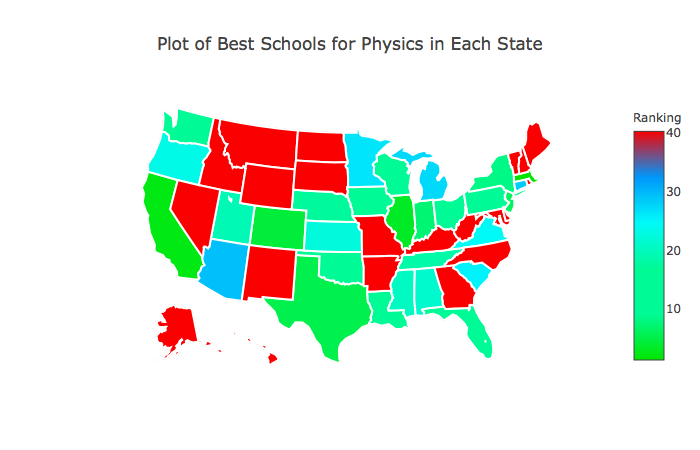

In [148]:
Image('Graph.png')

In [149]:
#Lets do it for the average too

In [150]:
grouped1 = grouped1.sort_values('Score')
grouped1 = grouped1.reset_index()
grouped1 = grouped1.reset_index()
grouped1['Rank'] = grouped1['index']+1
del grouped1['index']

In [151]:
alist = []
for state in grouped1['State']:
    alist.append(state)

missing = []
for state in states:
    if state not in alist:
        missing.append(state)
        
final_states_dict = { state: dictionary[state] for state in missing }

In [152]:
state_frame = pd.DataFrame(list(final_states_dict.items()),columns=['State','Ranking'])

In [153]:
grouped1 = grouped1.append(state_frame, ignore_index=True)

In [154]:
data2 = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = grouped1['State'],
        z = grouped1['Ranking'].astype(float),
        locationmode = 'USA-states',
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            )
        ),
        colorbar = dict(
            title = "Ranking"
        )
    ) ]

In [155]:
layout = dict(
        title = 'Plot of Average School Ranking for Physics in Each State',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)',
        ),
    )
fig2 = dict( data=data, layout=layout )


In [156]:
url2 = py.plot(fig2, filename='Average-Ranking-State-Physics' )

In [157]:
tls.embed(url2)

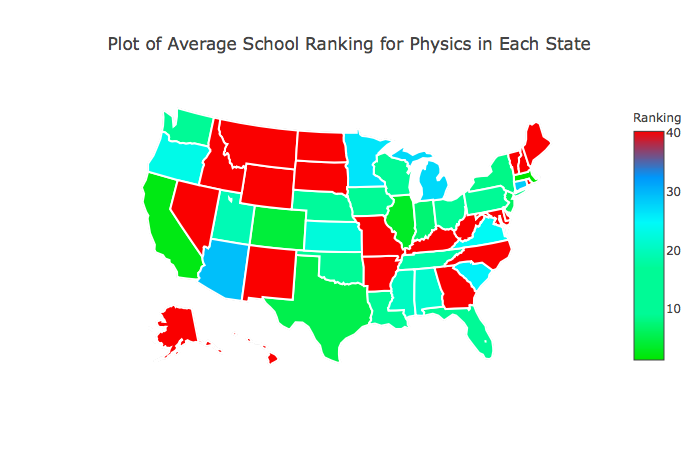

In [158]:
Image("Graph2.png")